In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv('master.csv')

In [5]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [7]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

In [9]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [17]:
data['year'] = data['year'].astype('object')

In [18]:
data['gdp_for_year($)'] = data['gdp_for_year($)'].str.replace(',','').astype('float').astype('Int64')

In [19]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [20]:
data.dtypes

country               object
year                  object
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k_pop    float64
country-year          object
HDI_for_year         float64
gdp_for_year($)        Int64
gdp_per_capita($)      int64
generation            object
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  object 
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k_pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_for_year($)    27820 non-null  Int64  
 10  gdp_per_capita($)  27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: Int64(1), float64(2), int64(3), object(6)
memory usage: 2.6+ MB


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

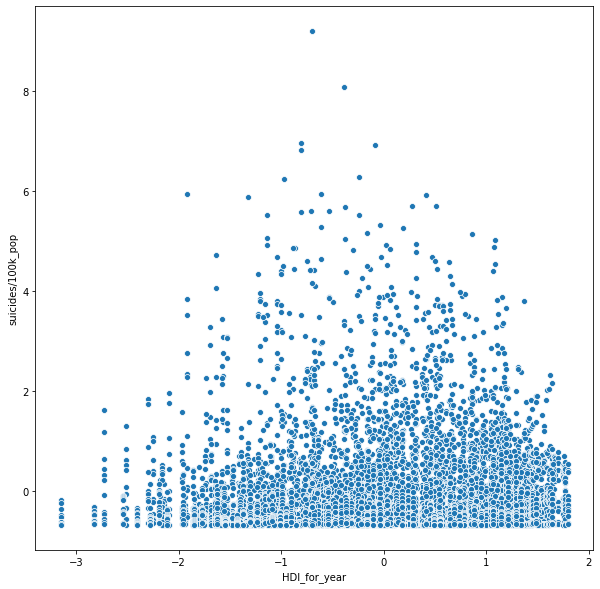

In [23]:
data_scaled = data.loc[:,['HDI_for_year','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_scaled,x='HDI_for_year',y='suicides/100k_pop')

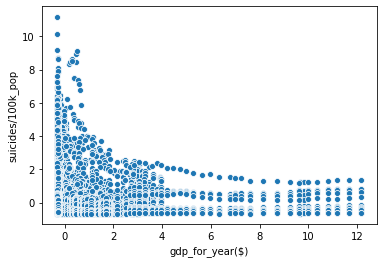

In [24]:
data_scaled = data.loc[:,['gdp_for_year($)','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
sns.scatterplot(data=data_scaled,x='gdp_for_year($)',y='suicides/100k_pop')

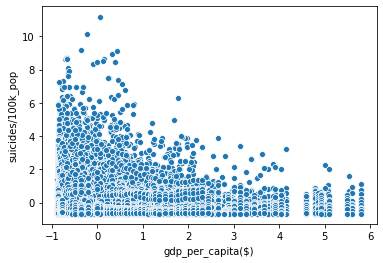

In [25]:
data_scaled = data.loc[:,['gdp_per_capita($)','suicides/100k_pop']]
data_scaled = (data_scaled - data_scaled.mean()) / data_scaled.std()
sns.scatterplot(data=data_scaled,x='gdp_per_capita($)',y='suicides/100k_pop')